## Topic Modeling 실습 (Sklearn & Gensim)
### 2012934768 최준호
### 비즈니스 애널리틱스 (캡스톤)
--------------
## Topic Modeling

영화 리뷰 데이터를 이용하여 topic modeling을 학습해보기

다른 CSV 가지고 실습을 해보았는데 잘 실행이 안되어 그대로 따라해보기로 하였음

**3번쨰 실습은 실행이 안됨 -> 이유: ix function이 중단이 됨 (pd를 통해 실행이 안되어 sklearn은 csv 밖에 안됨**

### Sklearn (csv 편)

다음무비에서 추출한 영화 리뷰를 불러온다.

- 이거 생각보다 조건이 어려움
- 비슷한 형식의 Csv로 하였지만 실패하였음

In [5]:
import csv
text = []
y = []

with open('movie_data_new.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[0]) > 10: #review 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[1]) #영화이름을 text 리스트에 추가

In [6]:
print('리뷰 수:', len(text))
print('리뷰영화:', set(y))

리뷰 수: 12445
리뷰영화: {'1', '6', '8', '5', '3', '7', '10', '2', '9', '4', '0'}


In [7]:
text[20:40]

['안 봐도 비디오. 타노스 잡자고 저글링하겠지. 재미도 없네. 방금 네이버에서 빌려서 봤는데. 난 솔직히 비매너 관객땜시 영화관 안 간다. 폰보고 전화통화하고 떠들고 의자 움직이고 의자 연결된 것 모르지? 뭘 알겠냐. 화장실 왔다갔다. 난 영화관은 안가 비싸기도 하고. 나중에 보면 되지. 근데, 가모라 죽이고, 비전 죽이고, 스파이더맨등등 흙먼지가 되어 없어지고, 뭐냐? 저글링해도 지네. 지는 걸로 끝났잖아. 어벤져스: 인피니티 워 다음편은 이기냐? 도대체 어떻게 이길라고? 스타크도 목숨 구걸하고. 대신 타임스톤 줘버리고. 야... 영화관 안 가길 정말 잘했다. 4400원은 뭐 그냥 궁금해서 썼다생각하지 뭐.',
 '처음 봤을때는 마케팅 쩐다고 생각했는데, 한번 더 보고 완전 명작이라는 걸 깨닫게 됐다',
 '역대 시리즈를 모르면 내용 이해불가 볼거리는 풍성해졌으나 이야기는 중구난방 짧은시간에 너무 많은 서사를 담은...',
 '내용을 세세하게 몰라도 재밌게 볼 수 있는 마블의 묘미',
 '마블시리즈 중 제일 괜찮음',
 '이건 뭐~  이 정도 돈과 출연진 가지고 이렇게 망칠 수도 있구나를 보여주는 대표작? 차라리 그냥 싸우고 부수는 거에만 집중했으면 기본은 했을텐데 역량도 안되며 진지하게 내용을 끌어가려고 욕심을 부리다 이도 저도 아닌 졸작을 만든 경우. 킬링타임용으로도 시간이 아까운 영화.',
 '이팀저팀 왔다갔다.. 진득히 몰입을 할수가 없었다. 근데 앤트맨은 못본것같은데 출연자 명단에 있네 나만 봇본걸까?',
 '다음편 언제나옴..???',
 '마블 팬이라면 반드시 봐야하는 영화',
 '정말 한순간도 놓치고 싶지 않을 정도로 너무 재미있게 봤고 무엇보다 마지막을 그렇게 해놔서 미치도록 궁금합니다!! 진짜 어떻게 다음 편을 기다리죠..?',
 '맛있는 비빔밥 먹는 느낌이였음 ~~  1점 .0점 애들은 그냥 마블하고 인연 끊길 빔 ~ 감독이 보여주고자 하는걸 이해하려는게 아닌  본인들 입맛에 맞는 영화를 만들길 원하는 이기적인 마인드만 가진 리뷰는 ~~ 

#### 한글 처리를 위해서는 konlpy가 필요

topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용
- Konlpy은 오로지 한글이기 때문에 영어는 전혀 안됨

In [8]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 500) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [9]:
review_cv.shape

(12445, 500)

#### sklearn의 LatentDirichletAllocation을 이용하여 topic modeling 수행
다양한 argument를 적절히 이용하는 것이 중요

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [11]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 500)
document-topic distribution dimenstion (12445, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [14]:
print_top_words(lda,vec.get_feature_names(), 5)

Topic #0: 점, 정도, 돈, 평점, 감독
Topic #1: 것, 더, 영화, 최고, 안
Topic #2: 영화, 이, 수, 내, 나
Topic #3: 연기, 진짜, 마동석, 윤계상, 편
Topic #4: 생각, 좀, 볼, 신파, 가족
Topic #5: 정말, 배우, 눈물, 연기, 차태현
Topic #6: 사람, 그, 광주, 꼭, 때
Topic #7: 감동, 보고, 재미, 그냥, 기대
Topic #8: 영화, 왜, 처음, 끝, 음악
Topic #9: 스토리, 시간, 장면, 원작, 마지막



#### 한 자로 구성된 명사들은 의미파악이 어려우므로 삭제할 필요가 있음
두 자 이상만 반환하는 함수를 작성

In [19]:
twitter_tag.nouns(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '적', '신념', '얼마나']

In [20]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [21]:
tokenizer(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '신념', '얼마나']

'적'과 같이 한 자로 된 단어를 제거하고 count vector 생성

In [22]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 500) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [24]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 30, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 연기, 액션, 영화, 중반, 긴장감, 악역, 언제, 실감, 시간, 피아노
Topic #1: 배우, 주인공, 연기력, 모든, 강철, 몰입도, 거의, 스토리, 영화, 출연
Topic #2: 장면, 하나, 대한, 영화, 후회, 기분, 기도, 존재, 번역, 가지
Topic #3: 역사, 영화, 사실, 소재, 영화관, 위해, 오늘, 드라마, 시대, 의미
Topic #4: 부분, 한번, 영화, 소리, 귀신, 생각, 전체, 감성, 차라리, 요즘
Topic #5: 관객, 때문, 조금, 영화, 천만, 결말, 보지, 아주, 어머니, 명작
Topic #6: 영화, 보기, 한국영, 시간, 극장, 상영, 조선족, 제대로, 실화, 발전
Topic #7: 눈물, 작품, 처음, 내내, 몰입, 영화, 간만, 감정, 모두, 나중
Topic #8: 진짜, 다시, 영화, 우리나라, 대박, 계속, 감동, 여운, 노력, 그닥
Topic #9: 정말, 영화, 최악, 억지, 엄마, 알바, 개연, 올해, 반성, 울음
Topic #10: 중간, 실망, 시리즈, 설정, 예고편, 볼거리, 토르, 화면, 누가, 상상
Topic #11: 그냥, 내용, 영화, 마블, 이상, 히어로, 관람, 집중, 자체, 엔딩
Topic #12: 광주, 우리, 가슴, 택시, 시민, 국민, 전두환, 진실, 민주화, 운전사
Topic #13: 감독, 공포영화, 역시, 공포, 영상, 실제, 혼자, 디즈니, 친구, 영화
Topic #14: 마동석, 윤계상, 범죄, 강추, 이번, 도시, 영화, 보시, 남한, 한편
Topic #15: 기대, 웹툰, 전개, 스토리, 뭔가, 전혀, 이유, 지루함, 얘기, 대해
Topic #16: 영화, 다른, 조연, 웃음, 주연, 조폭, 예상, 기술, 연기자, 형사
Topic #17: 수준, 연출, 한국, 캐릭터, 하정우, 대사, 주지훈, 흥행, 신파극, 영화
Topic #18: 가족, 감동, 별로, 아이, 약간, 만화, 이후, 반전, 시작, 펑펑
Topic #19: 느낌, 영화, 곤지암, 교훈

- 30개의 topic들을 대상으로 clustering을 수행해서 topic들이 잘 묶을 수 있는지 확인

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (30, 500)
Cluster label: [1 4 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3 0 0]


- T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (30, 2)


array([ -82.996025 ,   43.517017 ,  -36.192703 ,    7.6384363,
        -23.016718 ,  -35.152225 ,  -34.268513 ,   49.047836 ,
         93.144066 ,    4.6581073,   15.800384 ,   72.79098  ,
         10.949618 ,   52.77953  ,   59.772453 , -142.73886  ,
       -114.23088  ,   -3.1698358,   18.719398 , -142.03622  ,
          9.539953 ,  -84.893196 , -132.88226  ,  -51.67606  ,
        -47.315742 , -101.61784  ,  -77.483925 ,  106.924194 ,
         95.656456 ,  -66.55516  ], dtype=float32)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

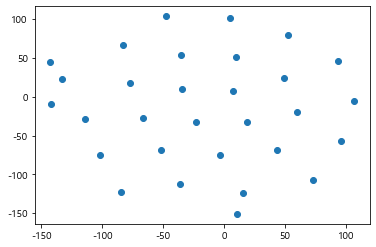

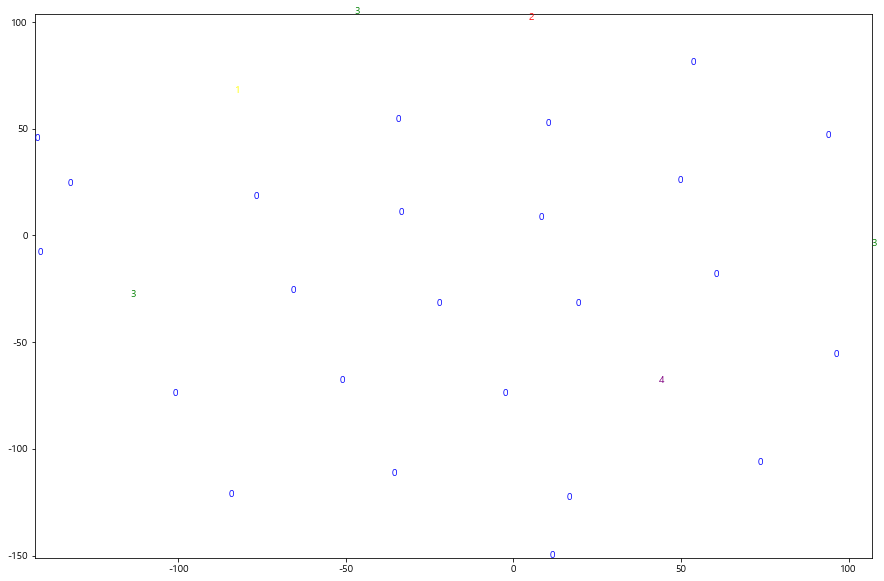

In [33]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

- cluster 5 말고는 다른 숫자 입력하면 오류뜸

#### 최적의 결과를 찾기 위한 방법
적절한 topic의 수는 perplexity 값을 이용해 찾음.

낮을 수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음

그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감

반복횟수는 5,000번 정도면 수렴

In [34]:
lda.perplexity(review_cv)

289.22147013029803

In [35]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 15, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 연기, 영화, 액션, 노스, 시간, 배우, 차태현, 하정우, 최고, 가장
Topic #1: 배우, 영화, 주인공, 스토리, 연기력, 차태현, 강철, 마블, 주지훈, 몰입도
Topic #2: 장면, 영화, 신파, 대한, 정도, 마지막, 나름, 눈물, 생각, 보고
Topic #3: 영화, 사람, 역사, 소재, 영화관, 사실, 생각, 시대, 의미, 드라마
Topic #4: 재미, 영화, 한번, 생각, 감동, 사람, 소리, 인간, 귀신, 보고
Topic #5: 영화, 관객, 진짜, 천만, 때문, 생각, 결말, 흥행, 조금, 부모님
Topic #6: 영화, 가족, 시간, 보기, 상영, 다른, 조선족, 실화, 감동, 시작
Topic #7: 영화, 눈물, 기대, 감동, 생각, 느낌, 감정, 마지막, 간만, 연출
Topic #8: 영화, 감동, 음악, 다시, 사랑, 우리나라, 여운, 뮤지컬, 노래, 진짜
Topic #9: 영화, 정말, 평점, 최악, 엄마, 알바, 그냥, 이유, 개연, 사람
Topic #10: 원작, 중간, 영화, 실망, 후반, 완전, 설정, 시리즈, 부분, 그래픽
Topic #11: 영화, 내용, 그냥, 히어로, 마블, 집중, 판타지, 아들, 자체, 스토리
Topic #12: 광주, 우리, 송강호, 가슴, 택시, 시민, 국민, 전두환, 민주화, 진실
Topic #13: 영화, 공포영화, 공포, 역시, 감독, 기억, 실제, 혼자, 디즈니, 영상
Topic #14: 마동석, 윤계상, 연기, 영화, 조연, 배우, 캐릭터, 진짜, 범죄, 주연



293.8264472932662

In [36]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 5, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 연기, 정말, 배우, 진짜, 시간, 최고, 마동석, 윤계상, 영화, 한국
Topic #1: 스토리, 느낌, 마블, 감독, 음악, 공포영화, 송강호, 역시, 하나, 수준
Topic #2: 눈물, 마지막, 광주, 정도, 기대, 그냥, 장면, 원작, 신파, 마음
Topic #3: 영화, 사람, 평점, 처음, 역사, 우리, 가슴, 사랑, 인생, 공포
Topic #4: 감동, 생각, 보고, 재미, 내용, 중간, 가족, 다시, 부분, 한번



251.02247565024624

## Gensim

In [6]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

In [7]:
# 필요한 library들을 import
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re

In [8]:
def tokenize(text):
    min_length = 3 #최소 단어 크기
    # nltk의 tokenizer를 이용해서 word 추출한 후에 소문자로 변환
    words = map(lambda word: word.lower(), word_tokenize(text))
    #words = word_tokenize(text.lower()) #이렇게 해도 되는지 확인
    # stopwords 제외
    words = [word for word in words if word not in cachedStopWords]
    # portr stemmer 적용
    tokens = (list(map(lambda token: PorterStemmer().stem(token),words)))
    #tokens = [PorterStemmer().stem(token) for token in words]  #이렇게 해도 되는지 확인
    #알파벳으로 이루어진 단어들만 추출
    p = re.compile('[a-zA-Z]+');
    filtered_tokens = list(filter (lambda token: p.match(token) and len(token) >= min_length,tokens))
    #filtered_tokens = [token for token in tokens if p.match(token) and len(token) >= min_length]   #이렇게 해도 되는지 확인
    return filtered_tokens

In [9]:
docs = [tokenize(doc) for doc in newsgroups_train.data]

In [10]:
print(newsgroups_train.data[0])
print(docs[0])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
['notic', 'save', 'model', 'map', 'plane', 'posit', 'care', 'file', 'reload', 'restart', 'given', 'default', 'posit', 'orient', 'save', 'file', 'positions/orient', 'preserv', 'anyon', 'know', 'inform', 'store', 'file', 'noth', 'explicitli', 'said', 'manual', 'save', 'textur', 'rule', 'file', 'like', 'abl', 'read', 'textur', 'rule', 'inform', 'anyon', 'format', 'file', 'file', 'format', 'a

In [11]:
from gensim.corpora import Dictionary

# 문서를 대표할 있는 딕션네리 만들기
dictionary = Dictionary(docs)
print('초기 문서에 존재하는 고유 단어:', len(dictionary))

# 10가지 문서에 존재하지 않은 단어를 제거 처리하고 전체의 20퍼보다 많은 거 역시 또한 제거 (필터링 작업)
dictionary.filter_extremes(no_below=3, no_above=0.5)
print('고유 단어들 (평범한 단어 또는 희귀한 단어 제거):', len(dictionary))

초기 문서에 존재하는 고유 단어: 19661
고유 단어들 (평범한 단어 또는 희귀한 단어 제거): 5628


In [12]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('고유 토큰 갯수: %d' % len(dictionary))
print('문서 갯수: %d' % len(corpus))

고유 토큰 갯수: 5628
문서 갯수: 2034


In [13]:
from gensim.models import LdaModel
# 트레이닝 파라미터 설정
num_topics = 25
chunksize = 500 # 문서 크기
passes = 20 # 문서를 거친 패스의 수
iterations = 40
eval_every = 1  # 다 노노, 시간 넘 오래거려서 노우

# 딕션네리에서 단어를 찾을 수 있는 인덱스 만들기
temp = dictionary[0]  #  딕션네리 로딩할 수 있게 도와주는 작업
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 27.4 s


In [16]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [23]:
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20     0.222251  0.056419       1        1  20.854238
12     0.049984 -0.206352       2        1  10.305048
18    -0.018568 -0.183590       3        1   9.446843
24     0.161281  0.134719       4        1   7.918383
19     0.148282  0.129011       5        1   5.213723
17    -0.041693 -0.162942       6        1   4.586040
4      0.051497 -0.215956       7        1   4.468527
8     -0.041397 -0.123452       8        1   3.905605
9      0.141034 -0.036060       9        1   3.638326
2      0.053315 -0.006986      10        1   3.609979
1      0.105780  0.142067      11        1   3.537893
21     0.007596  0.085155      12        1   3.277011
16     0.114186  0.095192      13        1   3.131830
0      0.101263 -0.163942      14        1   2.918501
15     0.125437  0.141360      15        1   2.855562
7      0.004135 -0.099052      16        1   2.508438
22     0.045783  0.041895      17        1   2.122631
3     -0.057201 -0.035688      18        1   1.253896
5     -0.147742  0.009634      19        1   0.969252
6     -0.004098  0.050111      20        1   0.828333
23    -0.192346  0.043292      21        1   0.676296
10    -0.198493  0.064055      22        1   0.653895
13    -0.190367  0.091649      23        1   0.645665
14    -0.207744  0.072748      24        1   0.353842
11    -0.232174  0.076712      25        1   0.320244, topic_info=        Term         Freq        Total Category  logprob  loglift
284     imag   831.000000   831.000000  Default  30.0000  30.0000
60       n't  1810.000000  1810.000000  Default  29.0000  29.0000
130    would  1329.000000  1329.000000  Default  28.0000  28.0000
214    space   912.000000   912.000000  Default  27.0000  27.0000
724      god   849.000000   849.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
4083  valley     5.293440    11.207919  Topic25  -4.6810   4.9937
351    hundr    13.518234    57.535487  Topic25  -3.7434   4.2955
94     level    15.573371   116.451881  Topic25  -3.6019   3.7319
2213   aviat     5.820919    18.139013  Topic25  -4.5860   4.6072
1797   engin     7.088590   161.251121  Topic25  -4.3889   2.6194

[1456 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4244     15  0.948439      a.a
398      19  0.922589      abc
4374     13  0.051531    abort
4374     16  0.927565    abort
1965     25  0.833213  abraham
...     ...       ...      ...
790       5  0.497263     york
790      19  0.497263     york
3606      6  0.943442     zero
3606     10  0.026955     zero
4043     20  0.598299  zillion

[2962 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 13, 19, 25, 20, 18, 5, 9, 10, 3, 2, 22, 17, 1, 16, 8, 23, 4, 6, 7, 24, 11, 14, 15, 12])

- 혹시나 하는 마음에 올리는 결과물 스크린 샷
![gensim_sucess](gensim_sucess.PNG)